# Part I - Prosper Loan Data Exploration
by **Abdellatif Shtayeh**

## Introduction
The Prosper Loan Data dataset contains detailed information on 113,937 loans, each described by 81 variables. These variables include loan amount, borrower rate (interest rate), current loan status, borrower income, and more. This exploration aims to uncover patterns, distributions, and relationships within the dataset using Python visualization libraries, starting with single-variable analyses and progressing to multi-variable insights.

## Preliminary Wrangling

In [2]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
df = pd.read_csv('Data/prosperLoanData.csv')

# Display basic information
print(df.shape)
print(df.info())
print(df.head())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

### Dataset Structure
The dataset comprises 113,937 rows (loans) and 81 columns (variables). Key variables include `LoanOriginalAmount`, `BorrowerRate`, `LoanStatus`, `IncomeRange`, and `ProsperRating (Alpha)`.

### Main Feature(s) of Interest
I am primarily interested in **loan performance** (via `LoanStatus`) and **borrower rate** (`BorrowerRate`), as they reflect loan outcomes and associated risk levels.

### Supporting Features
Features like `IncomeRange`, `Term`, `ProsperRating (Alpha)`, and `EmploymentStatus` will help investigate factors influencing loan performance and rates.

## Univariate Exploration
In this section, I will explore the distributions of individual variables to understand their characteristics and identify any anomalies.

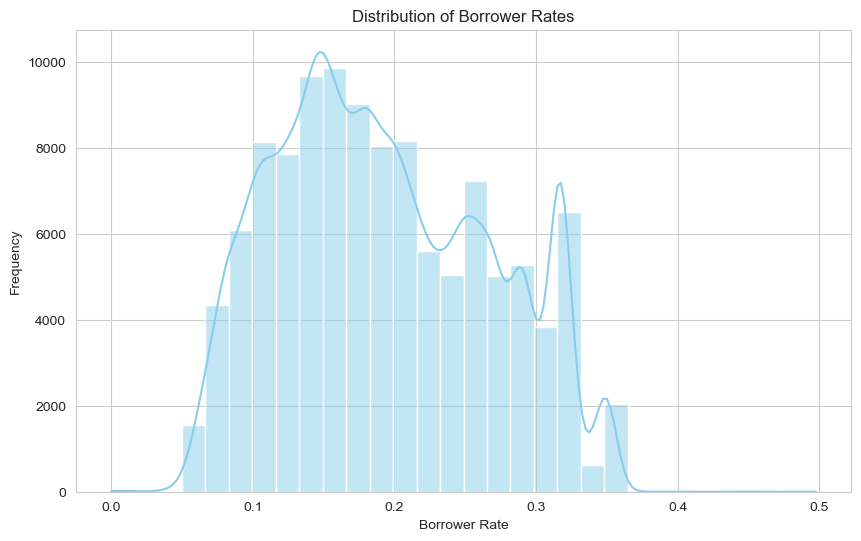

In [3]:
# Histogram of Borrower Rate
plt.figure(figsize=(10, 6))
sns.histplot(df['BorrowerRate'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Borrower Rates')
plt.xlabel('Borrower Rate')
plt.ylabel('Frequency')
plt.show()

**Question:** What is the distribution of borrower rates? </br>
**Observation:** The borrower rate distribution is roughly normal, peaking between 0.15 and 0.20. No significant outliers are observed although a bit abnormal between 0.30 and 0.35 but can be ignored, a picture-perfect normal distribution would require more data based on my research.

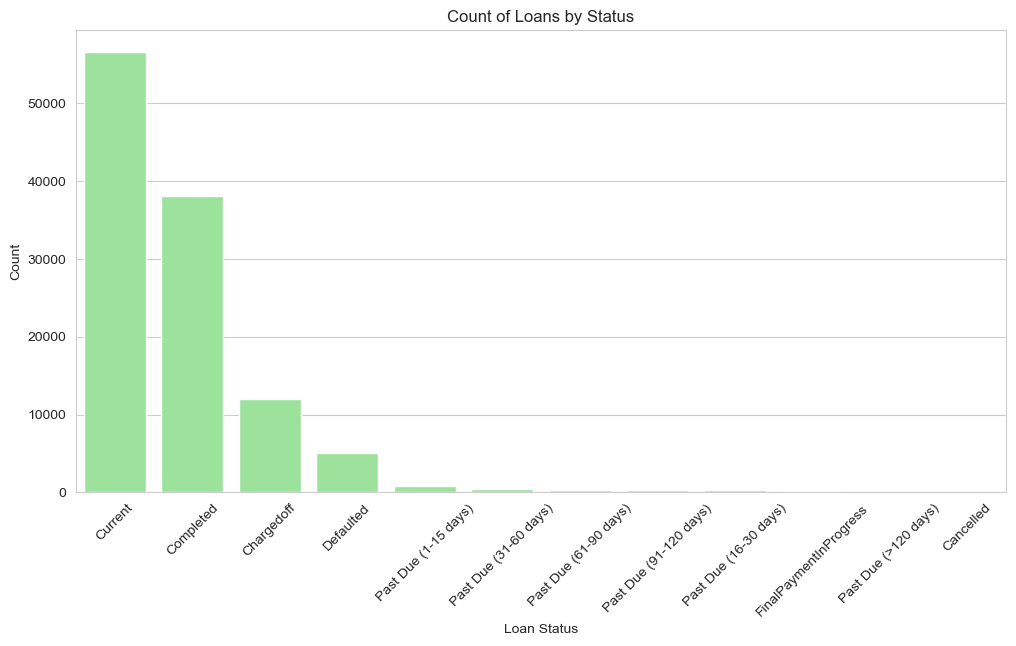

In [4]:
# Bar Chart of Loan Status
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='LoanStatus', order=df['LoanStatus'].value_counts().index, color='lightgreen')
plt.title('Count of Loans by Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Question:** How are loans distributed across different statuses? </br>
**Observation:** Most loans are either 'Current' and 'Completed,' with fewer in 'Chargedoff' and 'Defaulted' categories. This suggests a generally healthy loan portfolio.

**Discussion:** The borrower rate distribution is smooth with no unusual points, indicating no immediate need for transformations. The loan status distribution shows a skewed pattern, but it aligns with expectations for a loan dataset. No data cleaning or transformations were necessary at this stage.

## Bivariate Exploration
Here, I will examine relationships between pairs of variables to understand how they interact.

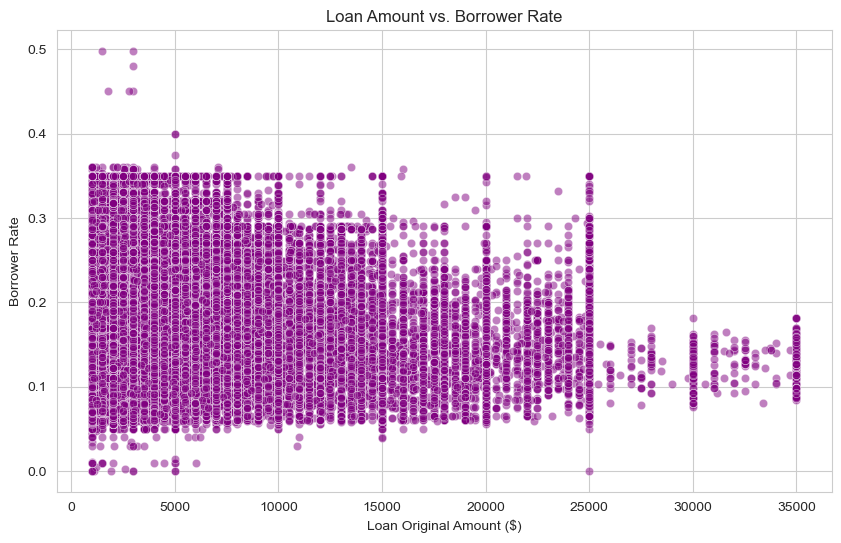

In [5]:
# Scatter Plot of Loan Amount vs. Borrower Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='LoanOriginalAmount', y='BorrowerRate', alpha=0.5, color='purple')
plt.title('Loan Amount vs. Borrower Rate')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Borrower Rate')
plt.show()

**Question:** Is there a relationship between loan amount and borrower rate? </br>
**Observation:** A slight negative correlation exists that very large loans tend to have lower borrower rates, possibly due to better creditworthiness.

**Question:** How does borrower rate vary by loan status? </br>
**Observation:** Defaulted and charged-off loans have higher median borrower rates, indicating riskier loans carry higher interest.

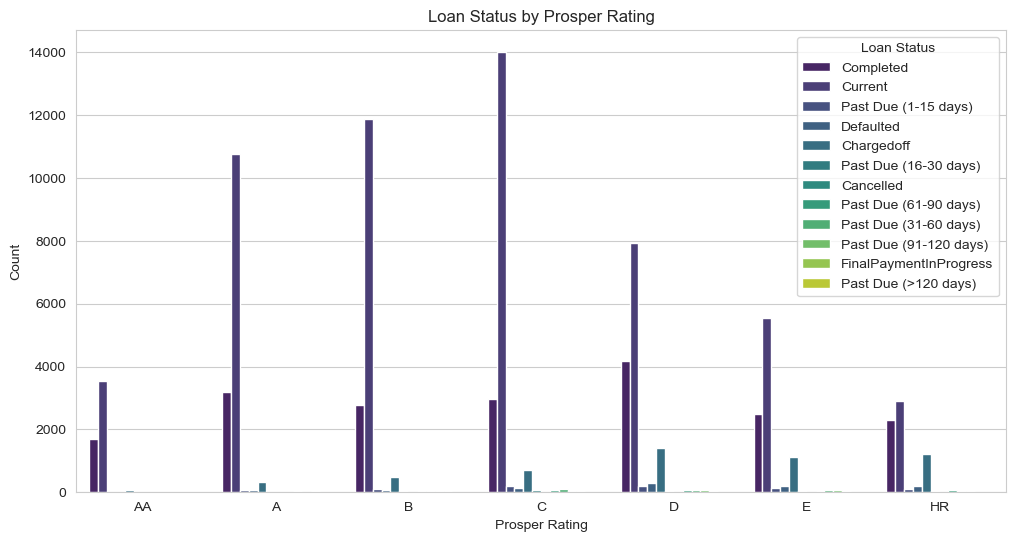

In [7]:
# Clustered Bar Chart of Prosper Rating and Loan Status
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ProsperRating (Alpha)', hue='LoanStatus', order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'], palette='viridis')
plt.title('Loan Status by Prosper Rating')
plt.xlabel('Prosper Rating')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

**Question:** How does loan status vary with Prosper rating? </br>
**Observation:** Higher ratings (A, B, C) have fewer defaults, while lower ratings (E, HR, D) show more defaults, validating the rating system’s predictive power.

**Discussion:** Borrower rate increases with riskier loan statuses, and Prosper rating strongly correlates with loan outcomes. No notable relationships emerged among supporting features alone.

## Multivariate Exploration
This section explores interactions among three or more variables to deepen our understanding.

/Users/macbook/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/macbook/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/macbook/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/macbook/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

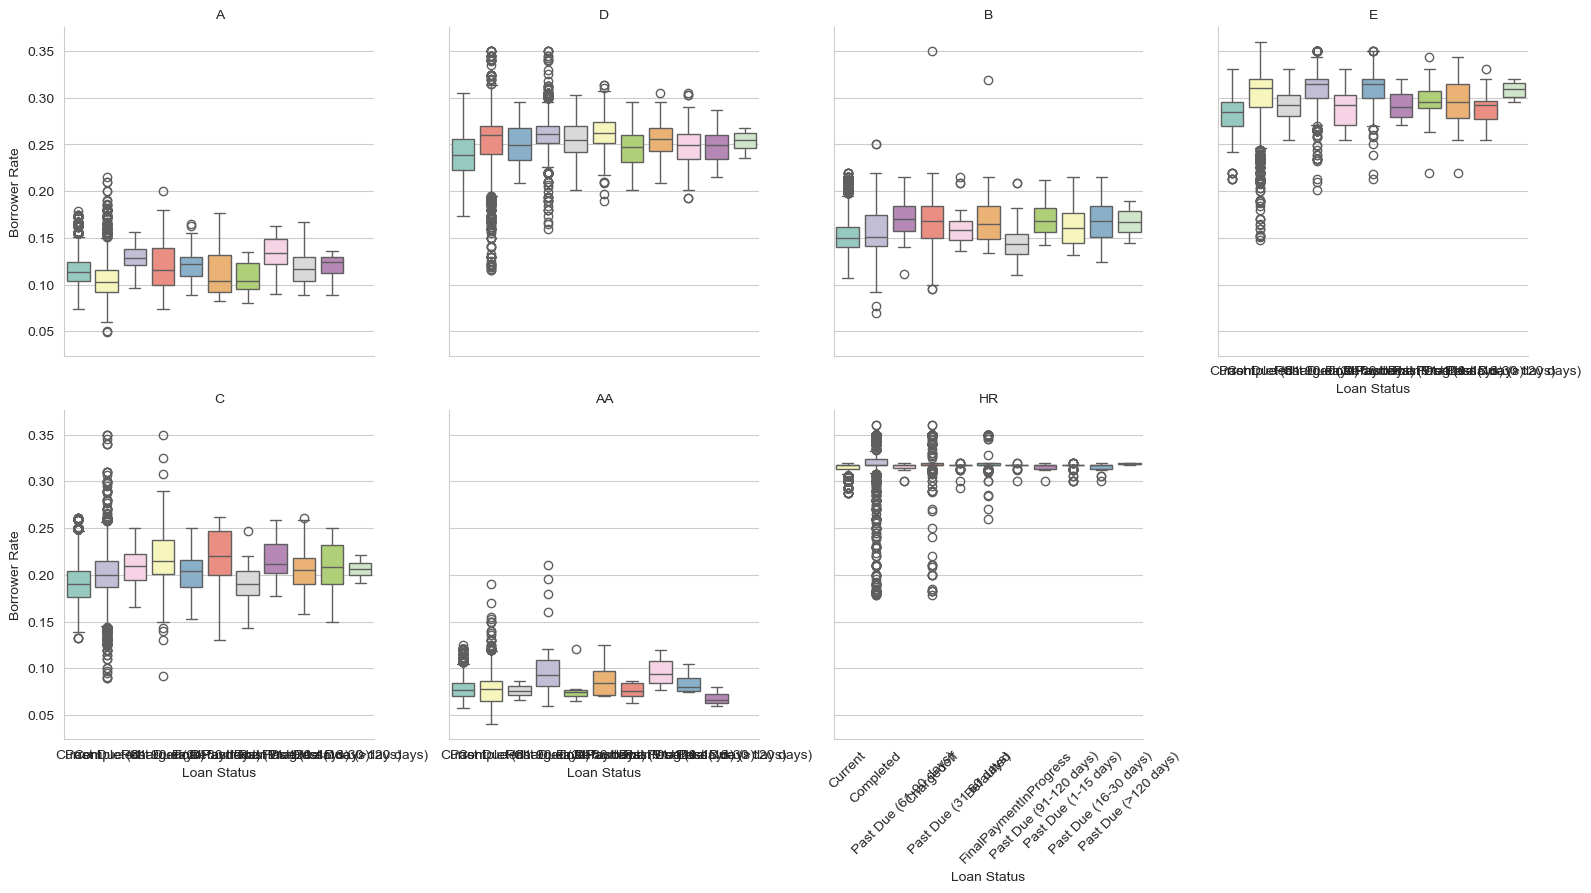

In [8]:
# Facet Plot of Borrower Rate by Loan Status and Prosper Rating
g = sns.FacetGrid(df, col='ProsperRating (Alpha)', col_wrap=4, height=4)
g.map(sns.boxplot, 'LoanStatus', 'BorrowerRate', palette='Set3')
g.set_titles('{col_name}')
g.set_axis_labels('Loan Status', 'Borrower Rate')
plt.xticks(rotation=45)
plt.show()

**Question:** How do borrower rate and loan status interact across Prosper ratings? </br>
**Observation:** Defaulted loans consistently have higher rates across all ratings, with the effect more pronounced in lower ratings.

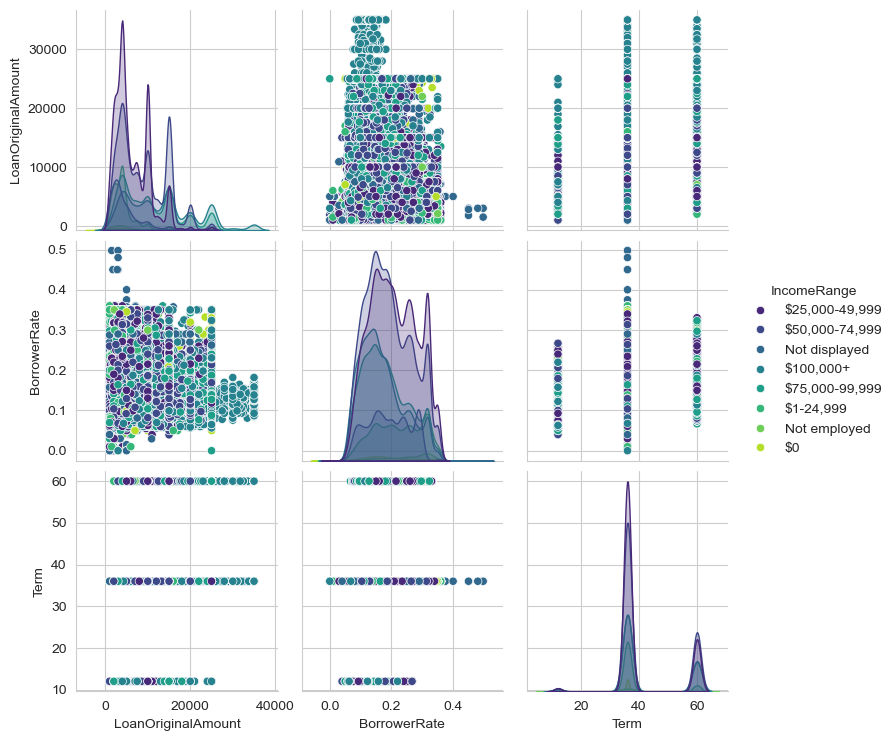

In [9]:
# Scatterplot Matrix
sns.pairplot(df[['LoanOriginalAmount', 'BorrowerRate', 'Term', 'IncomeRange']], hue='IncomeRange', palette='viridis')
plt.show()

**Question:** How do loan amount, borrower rate, and term relate across income ranges? </br>
**Observation:** Higher-income borrowers secure larger loans at lower rates, with term showing less variation.

**Discussion:** Income range strengthens the relationship between loan amount and borrower rate. The interaction between rating, status, and rate was particularly insightful.

## Conclusions
- Borrower rates are normally distributed, peaking at 0.15-0.20.
- Most loans are current or completed, with fewer defaults.
- Higher borrower rates correlate with increased default risk.
- Prosper rating effectively predicts loan performance.
- Higher-income borrowers obtain larger loans at lower rates.

The exploration progressed logically from univariate distributions to complex multivariate relationships, revealing key drivers of loan outcomes.